In [2]:
import pandas as pd
import os

# to modify for reading the file
PATH = os.getcwd() + '\Data'
filename = 'mias.txt'

# Reading data, whitespace separated

print("Reading dataframe")
info = pd.read_csv(os.path.join(PATH, filename), delim_whitespace=True)

print(info)

Reading dataframe
     REFNUM BG CLASS SEVERITY       X       Y  RADIUS
0    mdb001  G  CIRC        B  1815.0  1116.0   790.0
1    mdb002  G  CIRC        B  3091.0  1262.0   277.0
2    mdb003  D  NORM      NaN     NaN     NaN     NaN
3    mdb004  D  NORM      NaN     NaN     NaN     NaN
4    mdb005  F  CIRC        B   647.0  1163.0   122.0
..      ... ..   ...      ...     ...     ...     ...
317  mdb318  D  NORM      NaN     NaN     NaN     NaN
318  mdb319  D  NORM      NaN     NaN     NaN     NaN
319  mdb320  D  NORM      NaN     NaN     NaN     NaN
320  mdb321  D  NORM      NaN     NaN     NaN     NaN
321  mdb322  D  NORM      NaN     NaN     NaN     NaN

[322 rows x 7 columns]


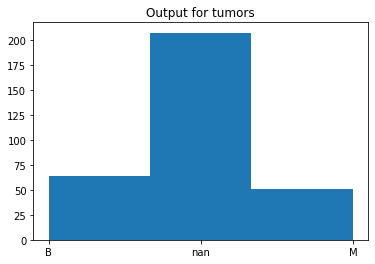

In [3]:

import matplotlib.pyplot as mpl
from typing import List, Tuple

# plots a histogram with 3 outputs (Benign as B, Malign as M, Normal as nan) 

def plot_output(count: List[int], name: str):
    n, _, _ = mpl.hist(count, 3)
    mpl.title(name)
    mpl.show()

plot_output(list(info.values[:, 3]), "Output for tumors")

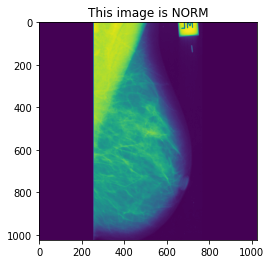

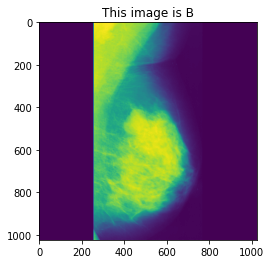

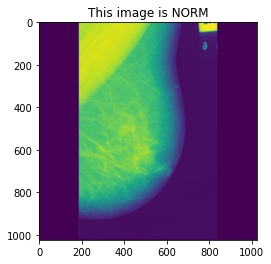

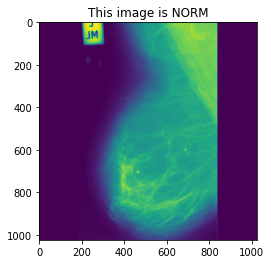

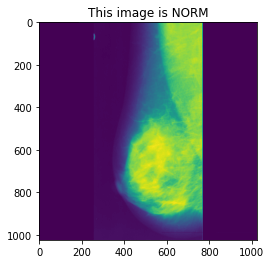

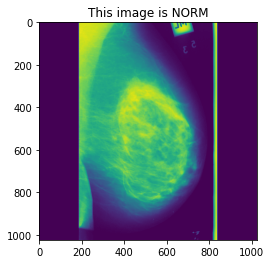

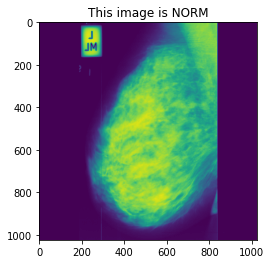

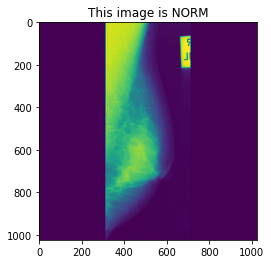

In [4]:
import matplotlib.image as mpimg
from numpy.random import randint


def generate_photo(x: List[int]) -> List[Tuple[str, int]]:
    """
    Generate photos' absolute path based on index
    """
    rez = []
    for el in x:
        nume = info.values[:, 0][el]
        nume += '.pgm'
        rez.append((os.path.join(PATH, nume), el))
    return rez

def plot_photos(x: List[Tuple[str, int]]):
    """
    Plot the photos given their absolute paths
    """
    for el in x:
        img = mpimg.imread(el[0])
        mpl.figure()
        
        # set the title to normal if normal
        # and to the severity of the tumor else
        if info.values[:, 2][el[1]] == 'NORM':
            title = info.values[:, 2][el[1]]
        else:
            title = info.values[:, 3][el[1]]
        mpl.title("This image is " + title)
        mpl.imshow(img)

# generates a vector with 8 random numbers 

pics = randint(321, size=(1, 8))

photos = generate_photo(list(pics[0]))

plot_photos(photos)